<center><img width="460" height="300" src="https://upload.wikimedia.org/wikipedia/en/thumb/7/70/KAUST_Logo.svg/1200px-KAUST_Logo.svg.png"></center>
<h2><center>$$King~Abduallah~University~for~Science~and~Technology$$</center></h2>
<h2><center>$$\underline{\textbf{Course}}:~\color{Gold}{Geo-Environmental~Modeling}~\color{orange}{and}~\color{Turquoise}{Analysis}~(ErSE~316)$$</center></h2>
<h2><center>$$\underline{\textbf{Instructors:}}~\textbf{Hylke Beck} ~ \textbf{and} ~ \textbf{Yoshihide Wada} ~$$</center></h2>
<h2><center>$$\underline{\textbf{Student:}}~Sofien~Resifi$$</center></h2>
<h3><center>$$\underline{\textbf{Assignment 5}}$$</center></h3>

# Github link

"https://github.com/resifis/geo_env/blob/main/Assignment5/"

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pdb
import xarray as xr
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

# Part 1: Data Download

$\large \textbf{1. Which band is most suitable for rainfall estimation?}$

The most suitable band for estimating rainfall is $\textbf{the longwave infrared}$ band, because it is effective at identifying cold cloud tops, which are often associated with deep convection and rainfall.

In [2]:
dset_00 = xr.open_dataset("GRIDSAT-B1.2009.11.25.00.v02r01.nc")
dset_03 = xr.open_dataset("GRIDSAT-B1.2009.11.25.03.v02r01.nc")
dset_06 = xr.open_dataset("GRIDSAT-B1.2009.11.25.06.v02r01.nc")
dset_09 = xr.open_dataset("GRIDSAT-B1.2009.11.25.09.v02r01.nc")
dset_12 = xr.open_dataset("GRIDSAT-B1.2009.11.25.12.v02r01.nc")

In [3]:
IR_00 = np.array(dset_00.variables["irwin_cdr"]).squeeze()
IR_03 = np.array(dset_03.variables["irwin_cdr"]).squeeze()
IR_06 = np.array(dset_06.variables["irwin_cdr"]).squeeze()
IR_09 = np.array(dset_09.variables["irwin_cdr"]).squeeze()
IR_12 = np.array(dset_12.variables["irwin_cdr"]).squeeze()

In [4]:
print("IR_00 shape = ",IR_00.shape)
print("IR_03 shape = ",IR_03.shape)
print("IR_06 shape = ",IR_06.shape)
print("IR_09 shape = ",IR_09.shape)
print("IR_12 shape = ",IR_12.shape)

IR_00 shape =  (2000, 5143)
IR_03 shape =  (2000, 5143)
IR_06 shape =  (2000, 5143)
IR_09 shape =  (2000, 5143)
IR_12 shape =  (2000, 5143)


In [5]:
def transform(IR):
    IR = np.flipud(IR)
    IR = IR*0.01+200
    IR = IR-273.15
    return IR
IR_00 = transform(IR_00)
IR_03 = transform(IR_03)
IR_06 = transform(IR_06)
IR_09 = transform(IR_09)
IR_12 = transform(IR_12)

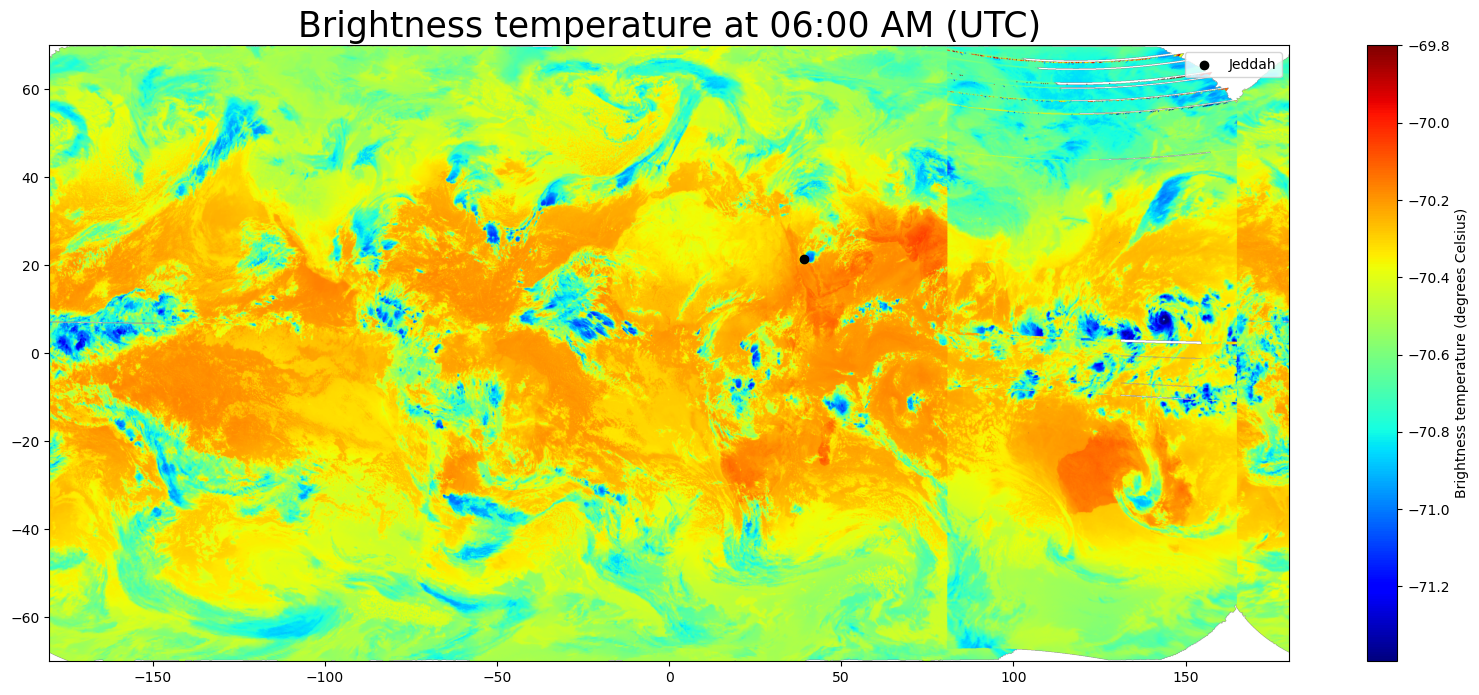

In [6]:
jeddah_lat = 21.5
jeddah_lon = 39.2
plt.figure(figsize = (20,8))
plt.title("Brightness temperature at 06:00 AM (UTC)",fontsize = 25)
plt.imshow(IR_06, extent=[-180.035, 180.035, -70.035, 70.035], aspect="auto",cmap = "jet")
cbar = plt.colorbar()
cbar.set_label("Brightness temperature (degrees Celsius)")
plt.scatter(jeddah_lon, jeddah_lat, color="black", marker="o", label="Jeddah")
plt.legend()

$\large \textbf{8. Identify the different continents on the map. What is the cause of the discontinuity around
80.8 $^\circ$longitude east?}$

The discontinuity at 80.8$^\circ$ east can occur at the boundary between the coverage areas of two geostationary satellites.

$\large \textbf{9. Why is there no data beyond approximately 70◦ north and south?}$

Geostationary satellites orbit the Earth at an altitude of approximately $\textbf{35,786 km}$ above the equator, matching the Earth's rotation period. This allows them to remain fixed over a specific longitude, providing continuous coverage of a large portion of the Earth's surface. However, due to their equatorial orbit, geostationary satellites have a $\textbf{limited view of high-latitude}$ regions. The Earth's curvature blocks the view of areas beyond approximately 70 $^\circ$ north and south.

$\large \textbf{10. Why is brightness temperature, rather than reflectance,}$
$\large \textbf{used as the preferred method for expressing longwave infrared data?}$

Brightness temperature is used for longwave IR data because it directly represents the thermal emission from objects, which provides a clear and intuitive way to interpret the data.

Longwave infrared primarily detects thermal radiation emitted by objects based on their temperature, as described by Planck's Law. While, Reflectance, on the other hand, is a measure of how much sunlight is reflected by a surface. Reflectance is more relevant for visible and shortwave infrared bands, where solar reflection dominates.

$\large \textbf{11. What is the approximate spatial resolution of the dataset, expressed in kilometers?}$

By looking at the latitude and longitude coordinates in the dataset we can say that the spatial resolution of the dataset is 0.069 $^\circ \times $ 0.07 $^\circ$ (lat $\times$ lon) which is around 7Km $\times$ 7Km

$\large \textbf{12. Which hour exhibits the lowest brightness temperatures in the Jeddah region?}$

In [7]:
#Extract brightness temperature from jeddah locations
list_data = [IR_00,IR_03,IR_06,IR_09,IR_12]
tb_jeddah = []
for data in list_data:
    tb_jeddah.append(data[2000 - 1307,3132])

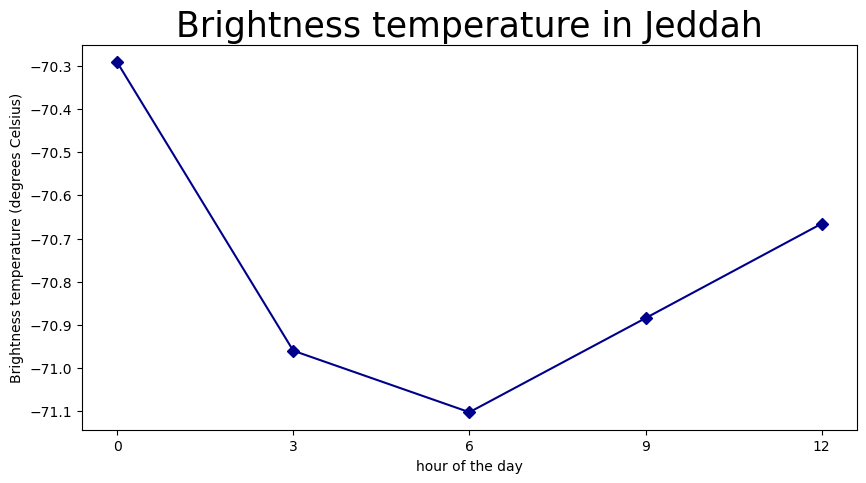

In [8]:
plt.figure(figsize = (10,5))
plt.title("Brightness temperature in Jeddah",fontsize = 25)
plt.plot([0,3,6,9,12],tb_jeddah,marker = "D",color = "darkblue")
plt.xticks([0,3,6,9,12],fontsize = 10)
plt.xlabel("hour of the day",fontsize = 10)
plt.ylabel("Brightness temperature (degrees Celsius)",fontsize = 10)
plt.show()

From the above figure we can see that the lowest brightness temperature in jeddah occured at $\textbf{06:00 AM (UTC)}$

# Part 3: Rainfall Estimation

$\large \textbf{1. Do lower brightness temperatures indicate higher or lower rainfall rates? Why?}$

Lower brightness temperature indicate higher rainfall rates. Lower brightness temperatures often indicate the presence of tall, convective clouds that are likely to produce high rainfall rates.

In [9]:
#Converting back the brightness temperature to K
IR_00 = IR_00+ 273.15
IR_03 = IR_03+ 273.15
IR_06 = IR_06+ 273.15
IR_09 = IR_09+ 273.15
IR_12 = IR_12+ 273.15

In [10]:
#Formula for estimation rainfall from brightness temperature.
A =  1.1183*1e11
b = 3.6382*1e-2
c =1.2
def auto_estimator(T):
    R = A*np.exp(-b*T**c)
    return R

In [11]:
R_00 = auto_estimator(IR_00)
R_03 = auto_estimator(IR_03)
R_06 = auto_estimator(IR_06)
R_09 = auto_estimator(IR_09)
R_12 = auto_estimator(IR_12)

$\large \textbf{3. Create a figure showing a map of the cumulative rainfall between 00:00 UTC and 12:00 UTC over Jeddah.}$ 
$\large \textbf{At what local time was the rainfall rate highest?}$

In [12]:
# Extract rainfall at jeddah location from 00:00 to 12:00
rain_data = [R_00,R_03,R_06,R_09,R_12]
rain_jeddah = []
for data in rain_data:
    rain_jeddah.append(data[2000 - 1307,3132])

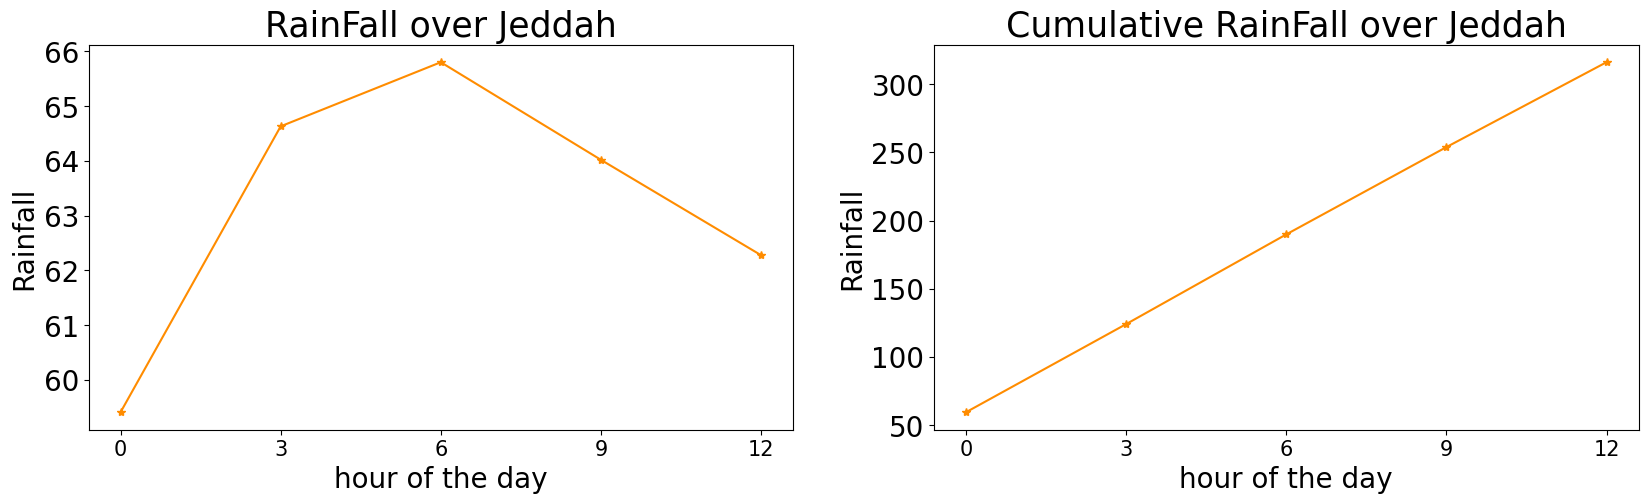

In [13]:
plt.figure(figsize = (20,5))
plt.subplot(121)
plt.title("RainFall over Jeddah",fontsize = 25)
plt.plot([0,3,6,9,12],rain_jeddah,marker = "*",color = "darkorange")
plt.xticks([0,3,6,9,12],fontsize = 15)
plt.xlabel("hour of the day",fontsize = 20)
plt.ylabel("Rainfall",fontsize = 20)
plt.yticks(fontsize = 20)
plt.subplot(122)
plt.title("Cumulative RainFall over Jeddah",fontsize = 25)
plt.plot([0,3,6,9,12],np.array(rain_jeddah).cumsum(),marker = "*",color = "darkorange")
plt.xticks([0,3,6,9,12],fontsize = 15)
plt.xlabel("hour of the day",fontsize = 20)
plt.ylabel("Rainfall",fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

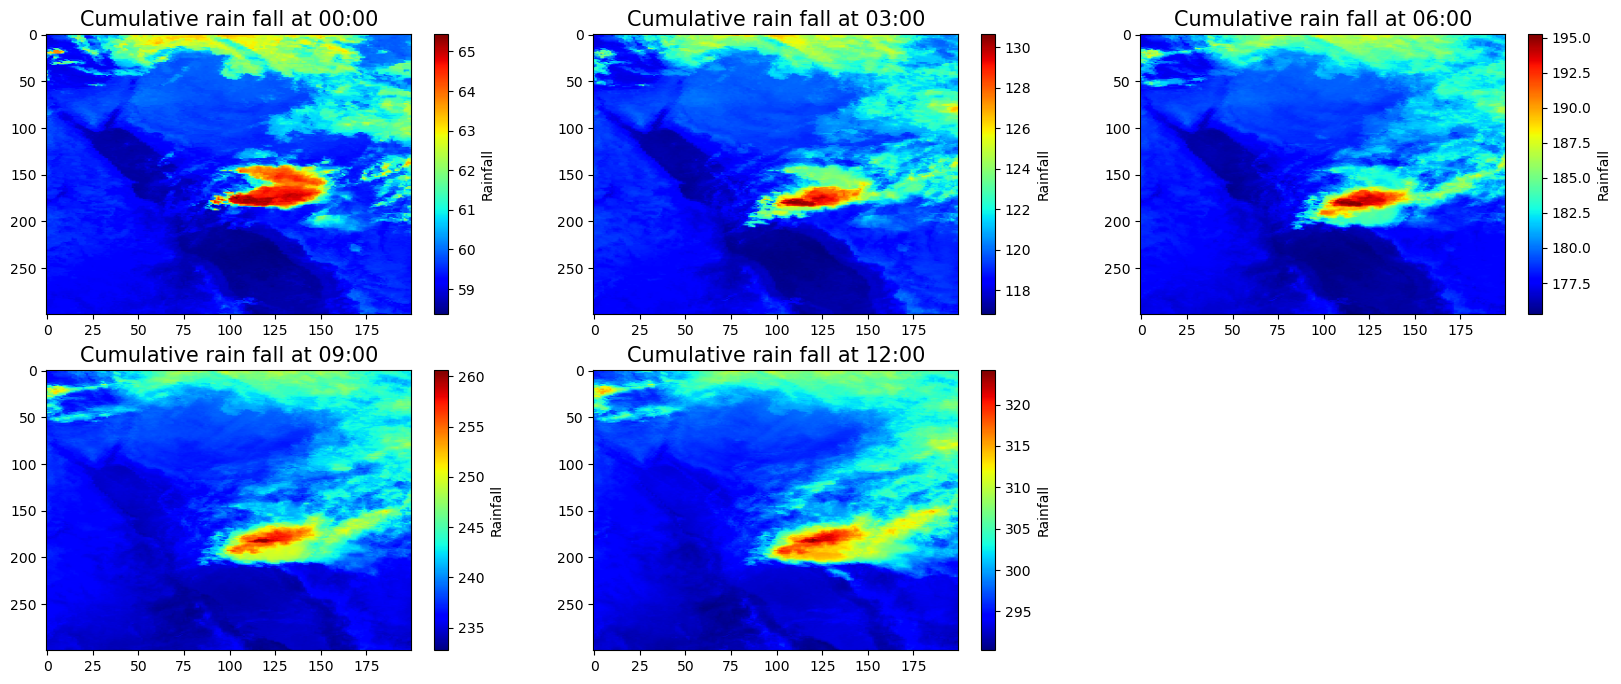

In [14]:
jeddah_lat = 21.5
jeddah_lon = 39.2
plt.figure(figsize = (20,8))
plt.subplot(231)
plt.title("Cumulative rain fall at 00:00",fontsize = 15)
plt.imshow(R_00[500:800,3132 - 100 : 3132 + 100], aspect="auto",cmap = "jet")
cbar = plt.colorbar()
cbar.set_label("Rainfall")
plt.subplot(232)
plt.title("Cumulative rain fall at 03:00",fontsize = 15)
plt.imshow((R_03+R_00)[500:800,3132 - 100 : 3132 + 100], aspect="auto",cmap = "jet")
cbar = plt.colorbar()
cbar.set_label("Rainfall")
plt.subplot(233)
plt.title("Cumulative rain fall at 06:00",fontsize = 15)
plt.imshow((R_06+R_03+R_00)[500:800,3132 - 100 : 3132 + 100], aspect="auto",cmap = "jet")
cbar = plt.colorbar()
cbar.set_label("Rainfall")
plt.subplot(234)
plt.title("Cumulative rain fall at 09:00",fontsize = 15)
plt.imshow((R_09+R_06+R_03+R_00)[500:800,3132 - 100 : 3132 + 100], aspect="auto",cmap = "jet")
cbar = plt.colorbar()
cbar.set_label("Rainfall")
plt.subplot(235)
plt.title("Cumulative rain fall at 12:00",fontsize = 15)
plt.imshow((R_12+R_09+R_06+R_03+R_00)[500:800,3132 - 100 : 3132 + 100], aspect="auto",cmap = "jet")
cbar = plt.colorbar()
cbar.set_label("Rainfall")

$\textbf{Description:}$ The highest rainfall rate occured at $\textbf{06:00 AM (UTC)}$ which corresponds to $\textbf{09:00 AM}$ local time

$\large \textbf{4. What are some limitations of estimating rainfall using thermal infrared data?}$

The limitations arise because thermal IR-based methods rely on indirect relationships between cloud-top temperatures and rainfall, rather than directly measuring precipitation. Moreover, IR-based rainfall estimation relies on empirical relationships between cloud-top temperature and rainfall, which may not hold true in all conditions or regions. For instance, IR-based rainfall estimation assumes that colder cloud tops (lower brightness temperatures) correspond to higher rainfall rates. However, this relationship is not always accurate. Besides, the relationship between cloud-top temperature and rainfall can vary throughout the day due to changes in solar heating and atmospheric stability.

$\large \textbf{5. Can you propose a more effective method for quantifying the rainfall associated with the
2009 Jeddah storm?}$

A more effective method to quantify the rainfall is to use different method of quantification. First, instead of thermal IR-based method we can use microwave sensors which are more accurate than IR-based methods because they detect the emission and scattering of precipitation-sized particles. Also we can check the  output of Numerical Weather Prediction (NWP) models and reanalysis products Such as ERA5 or high-resolution reanalysis data. Furthermore, relying on ground based measurements such as gauge measurments and ground-based radars would make the quantification more accurate.